In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nilearn as nl
import nibabel as nib
import nilearn.plotting as nlplt
from skimage import data
from skimage.util import montage 
import skimage.transform as skTrans
from skimage.transform import rotate
from skimage.transform import resize

This code is simple data exploration of the dataset, and plotting of the files. This is written by myself, using the nilearn library: https://nilearn.github.io/stable/index.html

In [2]:
df = pd.read_csv('C:/Users/VegardEikenes/Desktop/Bachelor/Data/BraTS21-17_Mapping.csv')
df.count()

BraTS2021                                           1251
BraTS2020                                            369
BraTS2019                                            335
BraTS2018                                            285
BraTS2017                                            285
Cohort Name (if publicly available)                 1255
Site No (represents the originating institution)    1255
Local ID                                             268
dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BraTS2021'),
  Text(1, 0, 'BraTS2020'),
  Text(2, 0, 'BraTS2019'),
  Text(3, 0, 'BraTS2018'),
  Text(4, 0, 'BraTS2017')])

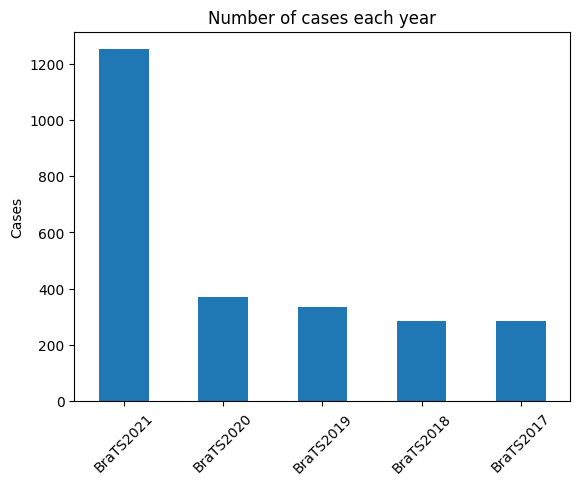

In [3]:
df = df.iloc[:, :5]
df.count().plot(kind='bar')
plt.ylabel('Cases')
plt.title('Number of cases each year')
plt.xticks(rotation=45)

In [4]:
path = 'C:/Users/VegardEikenes/Desktop/Bachelor/Data/BraTS2021_TrainingData/'

flair = nib.load(path + 'BraTS2021_00000/BraTS2021_00000_flair.nii').get_fdata()
t1 = nib.load(path + 'BraTS2021_00000/BraTS2021_00000_t1.nii').get_fdata()
t1ce = nib.load(path + 'BraTS2021_00000/BraTS2021_00000_t1ce.nii').get_fdata()
t2 = nib.load(path + 'BraTS2021_00000/BraTS2021_00000_t2.nii').get_fdata()
seg = nib.load(path + 'BraTS2021_00000/BraTS2021_00000_seg.nii').get_fdata()

In [16]:
flair.shape[0]//2 - 50

70

Text(0.5, 1.0, 'Segmentation Mask')

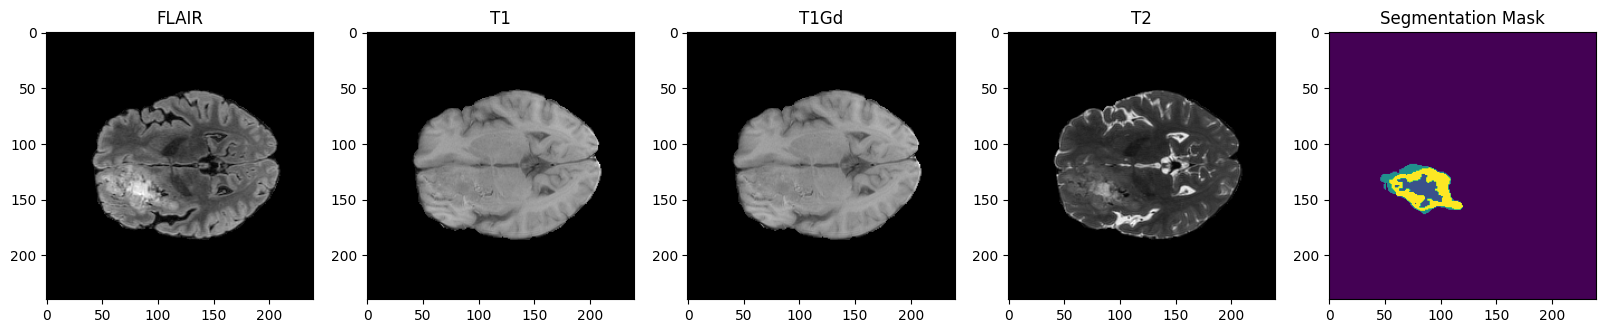

In [18]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 10))
ax1.imshow(flair[:,:,70], cmap = 'gray')
ax1.set_title('FLAIR')
ax2.imshow(t1[:,:,70], cmap = 'gray')
ax2.set_title('T1')
ax3.imshow(t1[:,:,70], cmap = 'gray')
ax3.set_title('T1Gd')
ax4.imshow(t2[:,:,70], cmap = 'gray')
ax4.set_title('T2')
ax5.imshow(seg[:,:,70])
ax5.set_title('Segmentation Mask')

Text(0.5, 1.0, 'Patient 00000 3D plot')

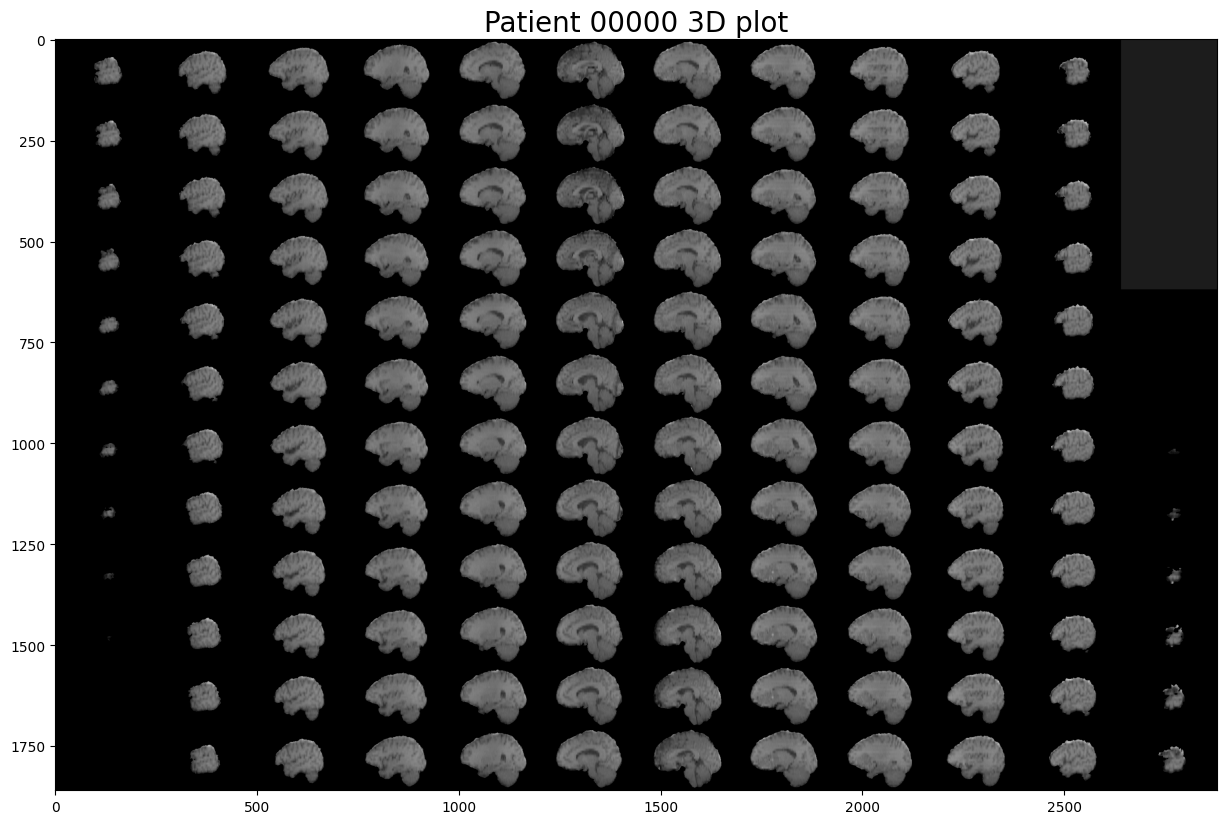

In [15]:
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(rotate(montage(test_image_t1[50:-50,:,:]), 90, resize=True), cmap ='gray')
plt.title('Patient 00000 3D plot', fontsize=20)

Text(0.5, 1.0, 'Segmentation Mask Patient 00000')

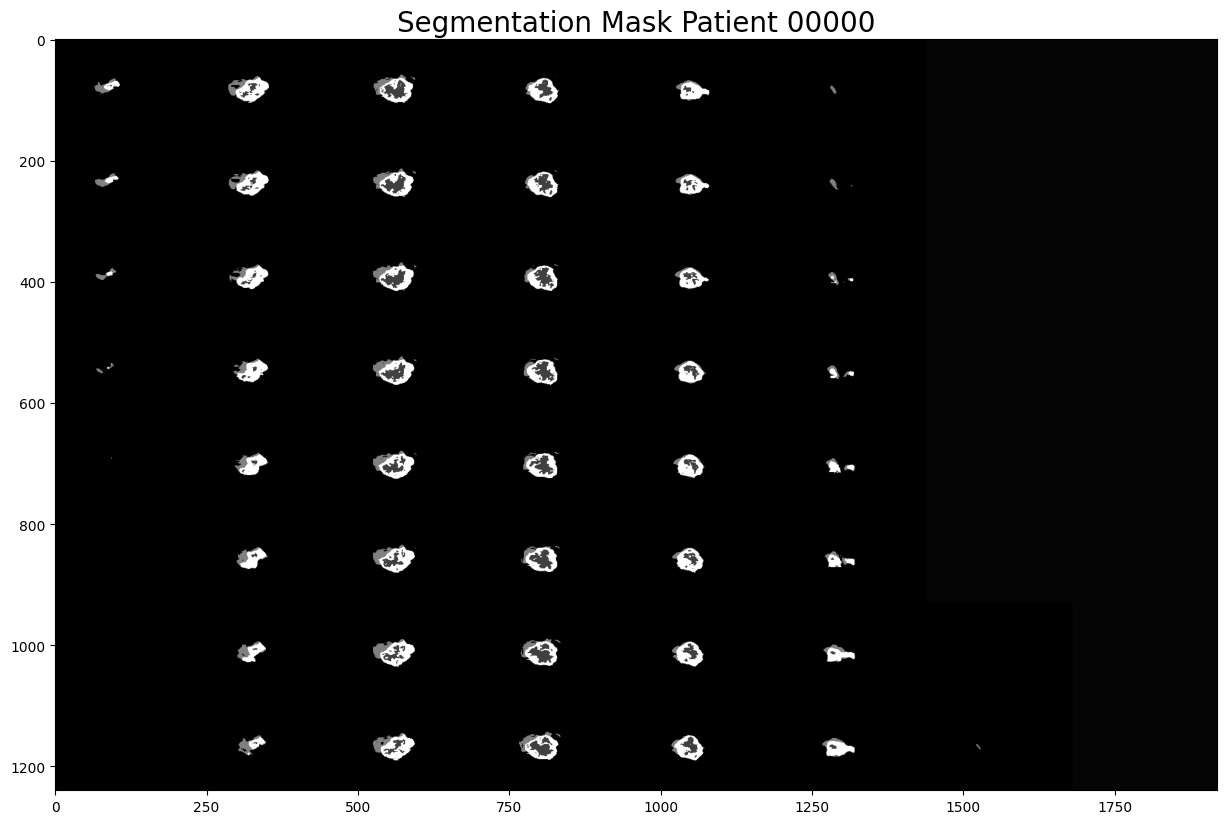

In [8]:
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(rotate(montage(test_mask[115:-75,:,:]), 90, resize=True), cmap ='gray')
plt.title('Segmentation Mask Patient 00000', fontsize=20)

In [7]:
flair_img = nl.image.load_img(path + 'BraTS2021_00000/BraTS2021_00000_flair.nii')
seg_img = nl.image.load_img(path + 'BraTS2021_00000/BraTS2021_00000_seg.nii')

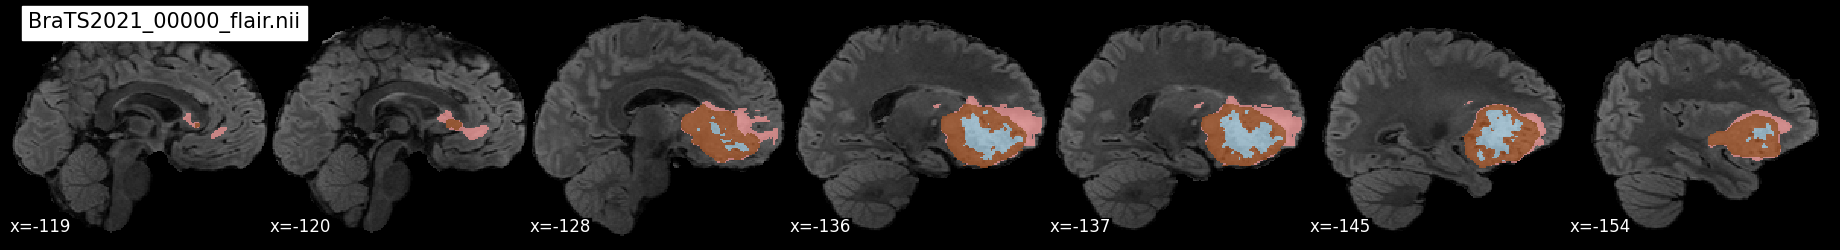

In [8]:
nlplt.plot_roi(seg_img, 
               title='BraTS2021_00000_flair.nii',
               bg_img=flair_img, 
               cmap='Paired',
               display_mode='x',)

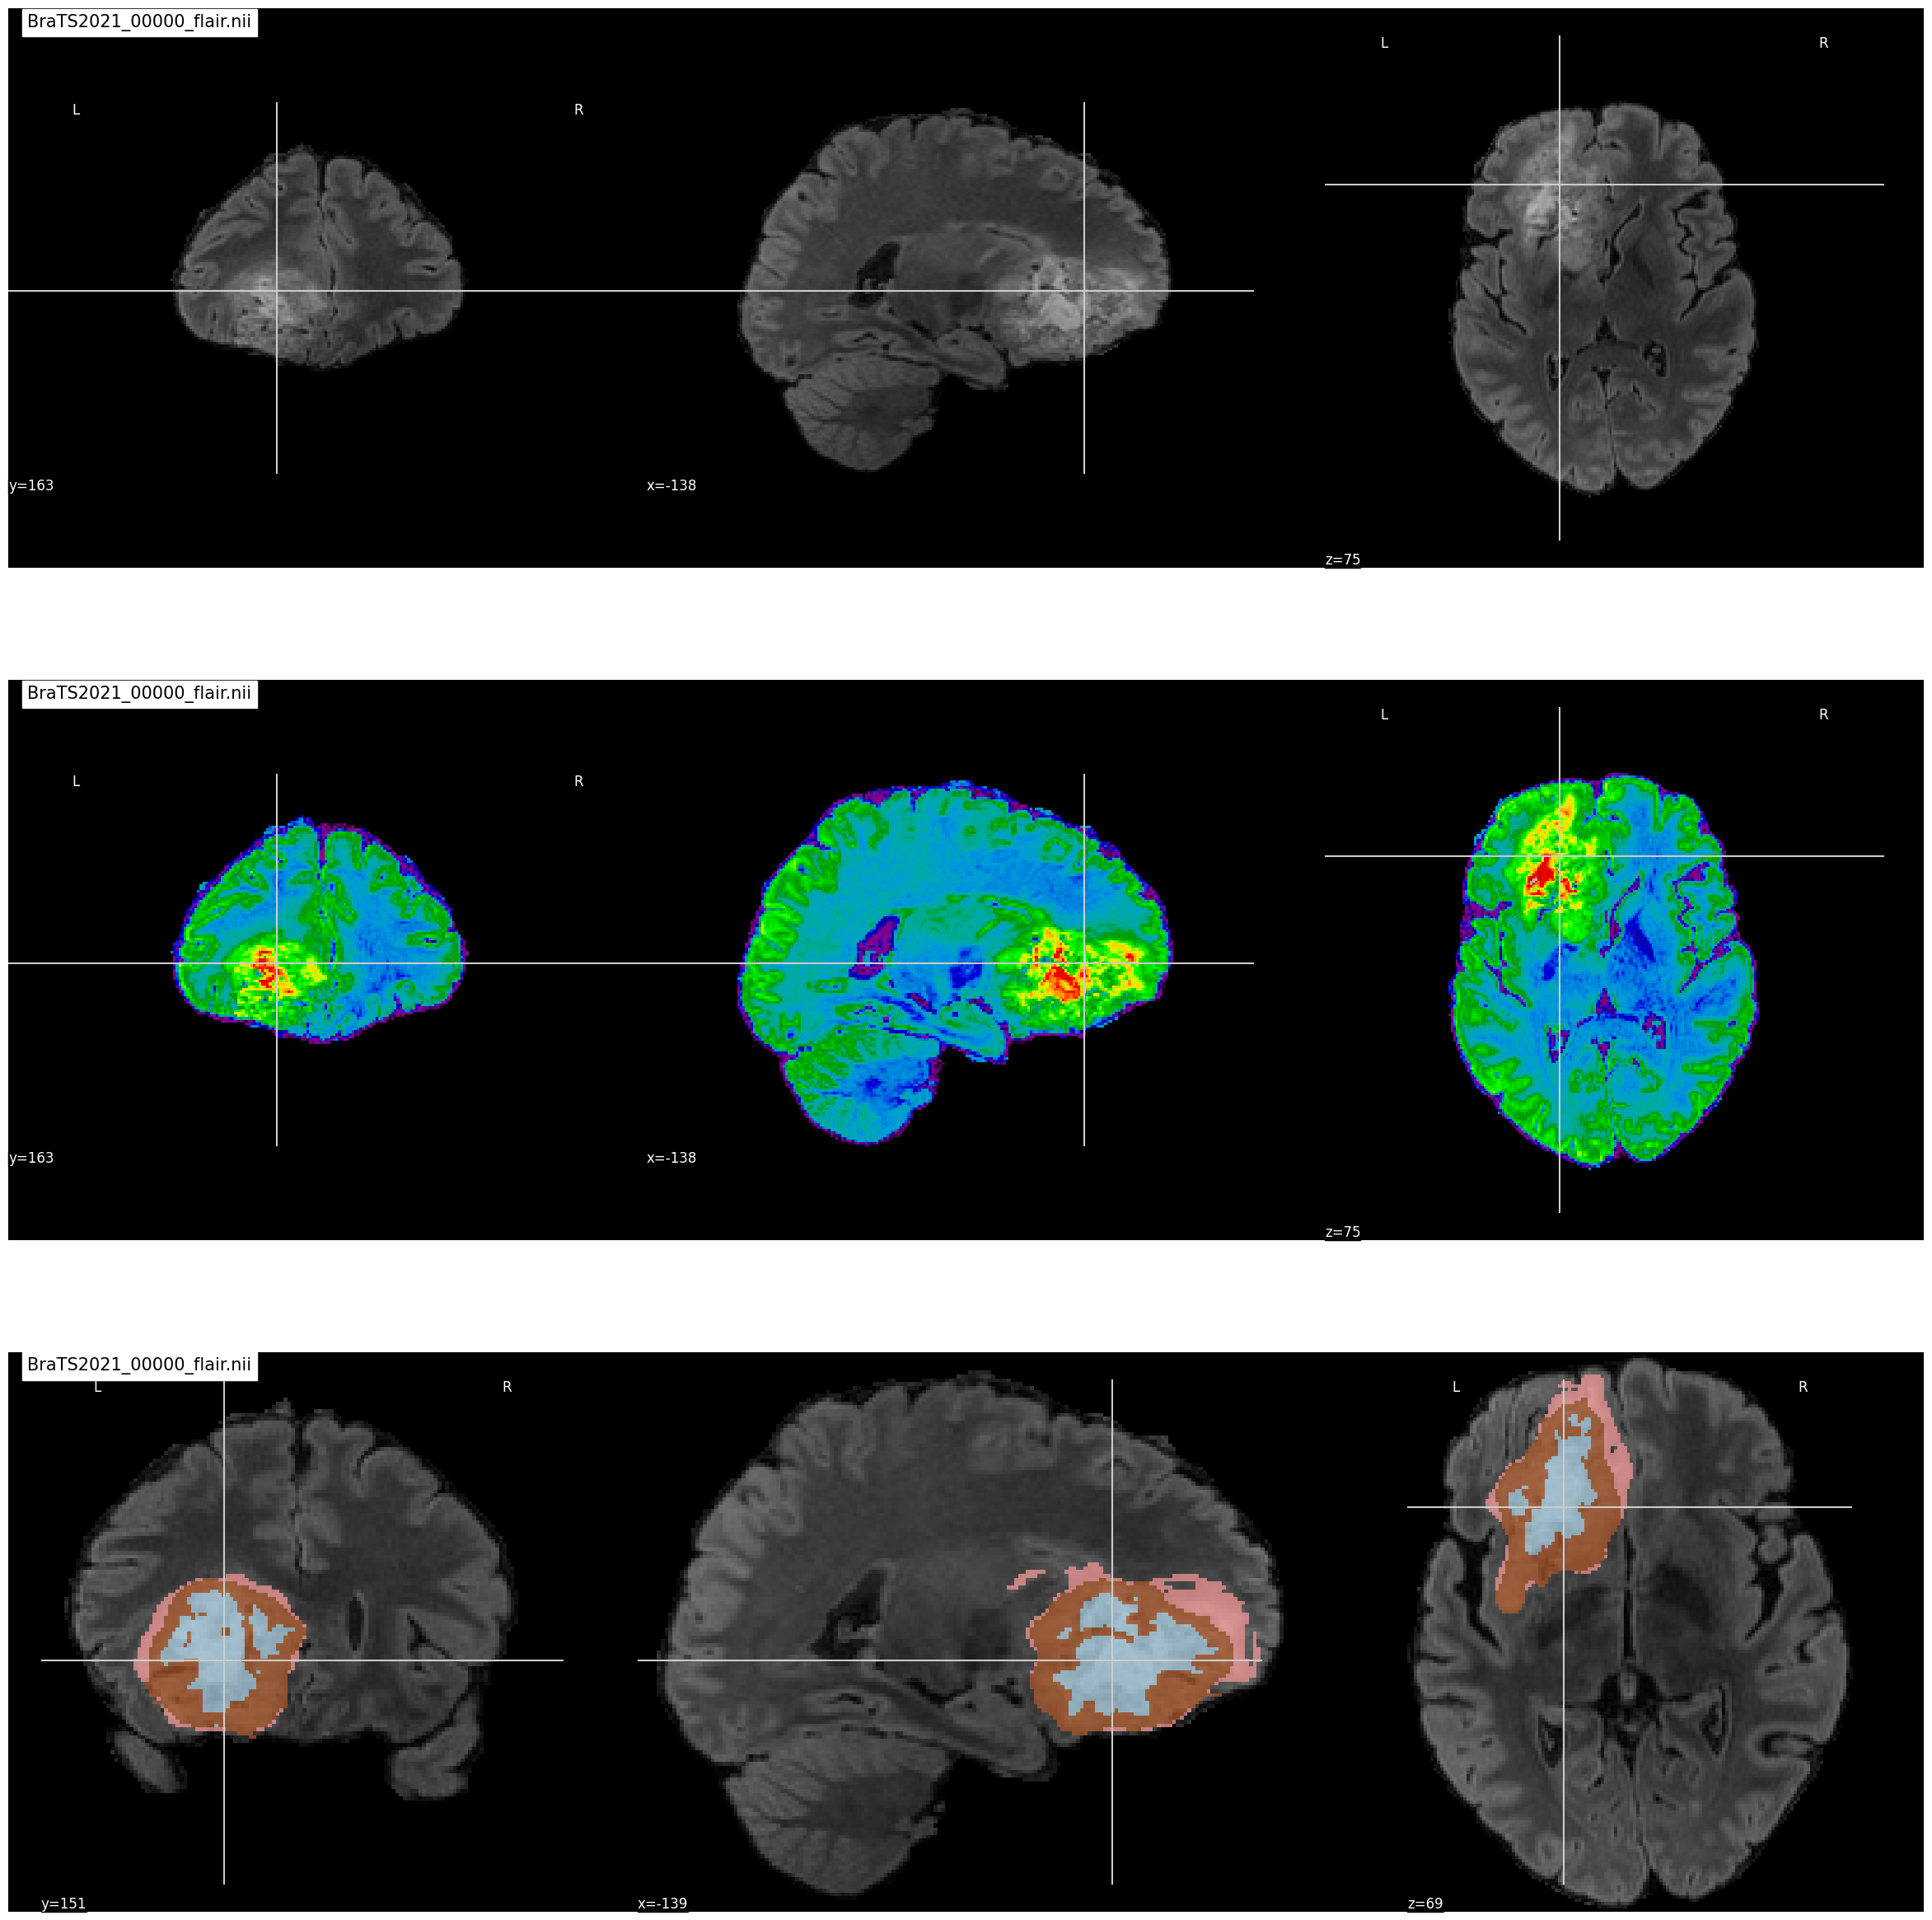

In [12]:
fig, axes = plt.subplots(nrows=3, figsize=(30, 30))


nlplt.plot_anat(flair_img, title='BraTS2021_00000_flair.nii', axes=axes[0])

nlplt.plot_epi(flair_img, title='BraTS2021_00000_flair.nii', axes=axes[1])

nlplt.plot_roi(seg_img, title='BraTS2021_00000_flair.nii', bg_img=flair_img, axes=axes[2], cmap='Paired')
plt.show()

Text(0.5, 1.0, 'Patient 00000 3D plot')

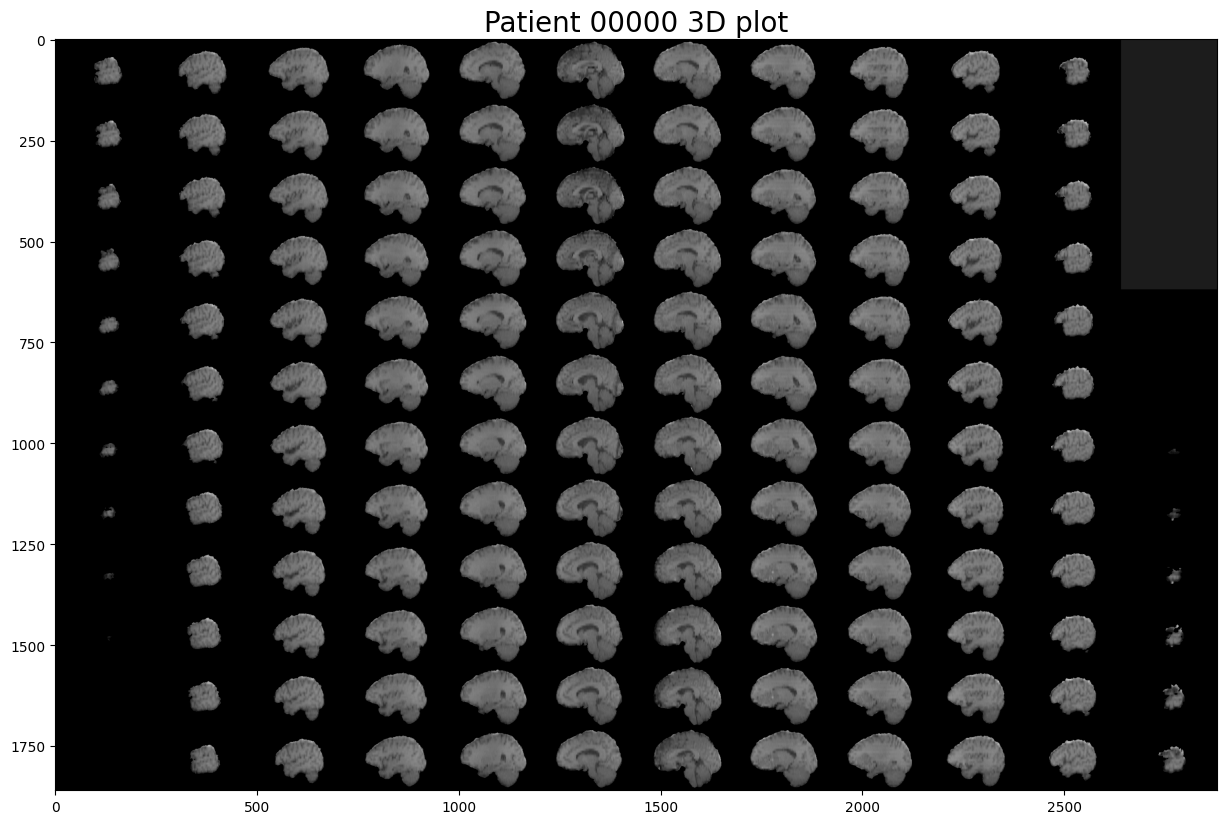

In [14]:
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(rotate(montage(t1[50:-50,:,:]), 90, resize=True), cmap ='gray')
plt.title('Patient 00000 3D plot', fontsize=20)